In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Today we are going to practice split,apply,combine in pandas
# 2. we'll also make intutive graphs using matplotlib and seaborn


In [2]:
# create a data frame using a dictionary
sales_dict={'colour':['yellow','black','blue','red',
                      'yellow','black','blue','red',
                      'yellow','black','blue','red',
                      'yellow','black','blue','red',
                     'blue','red'],
            'sales':[100000,150000,80000,90000,
                    200000,145000,120000,300000,
                    250000,200000,160000,90000,
                    90100,150000,142000,130000,
                    400000,350000],
           'transactions':[100,150,820,920,
                          230,120,70,250,
                          250,110,130,860,
                          980,300,150,170,
                          230,280],
           'product':['type a','type a','type a','type a','type a','type a','type a','type a','type a',
                      'type b','type b','type b','type b','type b','type b','type b','type b','type b']}

In [3]:
sales_df= pd.DataFrame(sales_dict)


# extra questions.
1). How to create a data frame using nested dictionary?

In [4]:
nested_dict={'players':{'first_name':['lebron','kevin','giannis','kawhi','steph'],
                        'last_name':['james','durant','antetkounmpo','leonard','curry']},
            'info':{'team':['lakers','nets','bucks','clippers','warriors'],
                   'jersey_no':['23','35','34','2','30']}}

In [5]:
nested_dict.items()

dict_items([('players', {'first_name': ['lebron', 'kevin', 'giannis', 'kawhi', 'steph'], 'last_name': ['james', 'durant', 'antetkounmpo', 'leonard', 'curry']}), ('info', {'team': ['lakers', 'nets', 'bucks', 'clippers', 'warriors'], 'jersey_no': ['23', '35', '34', '2', '30']})])

In [6]:
nested_df= {key:pd.DataFrame(values) for key,values in nested_dict.items()}

In [7]:
nested_df

{'players':   first_name     last_name
 0     lebron         james
 1      kevin        durant
 2    giannis  antetkounmpo
 3      kawhi       leonard
 4      steph         curry,
 'info':        team jersey_no
 0    lakers        23
 1      nets        35
 2     bucks        34
 3  clippers         2
 4  warriors        30}

In [8]:
nested_df= pd.concat(nested_df,axis=1)

In [9]:
nested_df

players                    info          
  first_name     last_name      team jersey_no
0     lebron         james    lakers        23
1      kevin        durant      nets        35
2    giannis  antetkounmpo     bucks        34
3      kawhi       leonard  clippers         2
4      steph         curry  warriors        30

# Sales analysis

In [10]:
sales_df

,colour,sales,transactions,product
0,yellow,100000,100,type a
1,black,150000,150,type a
2,blue,80000,820,type a
3,red,90000,920,type a
4,yellow,200000,230,type a
5,black,145000,120,type a
6,blue,120000,70,type a
7,red,300000,250,type a
8,yellow,250000,250,type a
9,black,200000,110,type b


<BarContainer object of 2 artists>

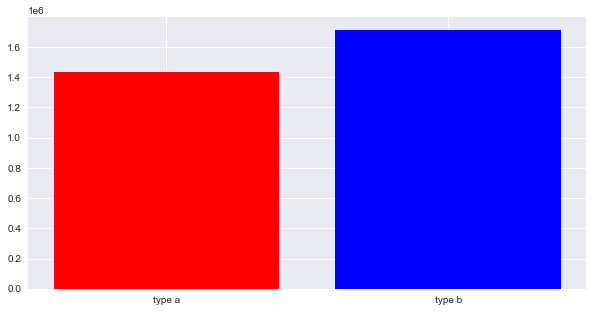

In [11]:
#distribtion of sales by product using matplotlib
x_axis=['type a','type b']
y_axis=[(sales_df['sales'][sales_df['product'] =='type a']).sum(),(sales_df['sales'][sales_df['product']=='type b']).sum()]

plt.style.use('seaborn')
plt.figure(figsize=(10,5))

plt.bar(x_axis,y_axis,color=['red','blue'])

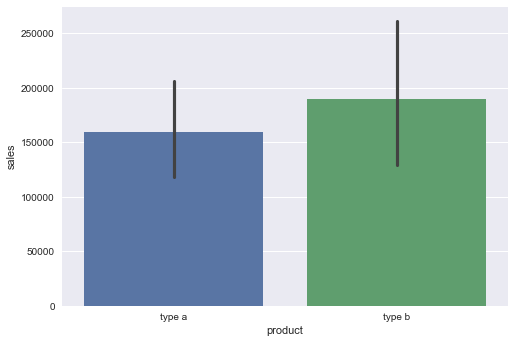

In [12]:
#distribtion of sales by product using seaborn
sns.barplot('product','sales',data=sales_df)


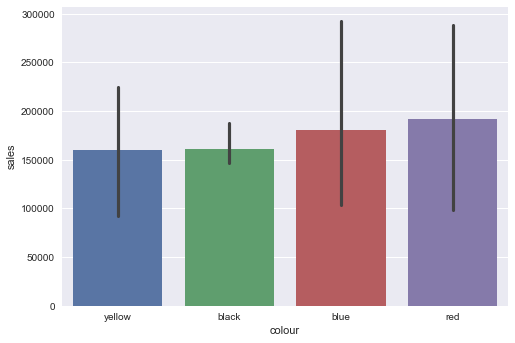

In [13]:
#distribtion of sales by color using seaborn
sns.barplot('colour','sales',data=sales_df)

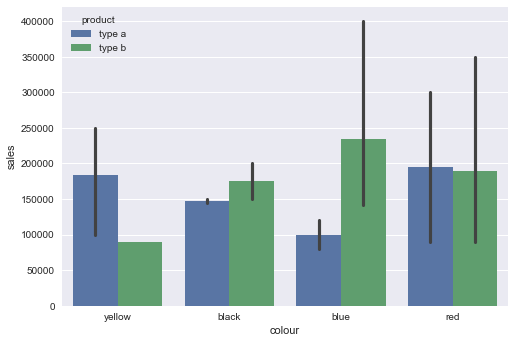

In [14]:
sns.barplot('colour','sales',hue='product',data=sales_df)

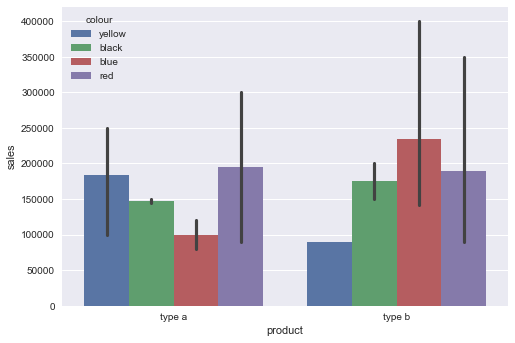

In [15]:
sns.barplot('product','sales',hue='colour',data=sales_df)

In [16]:
sales_df.describe()

,sales,transactions
count,18.000000,18.000000
mean,174838.888889,340.000000
std,93485.306419,313.368792
min,80000.000000,70.000000
25%,105000.000000,135.000000
50%,147500.000000,230.000000
75%,200000.000000,295.000000
max,400000.000000,980.000000


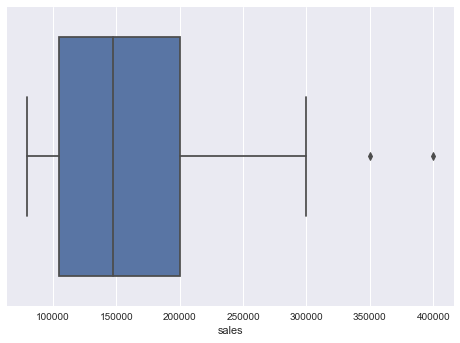

In [17]:
sns.boxplot('sales',data=sales_df)

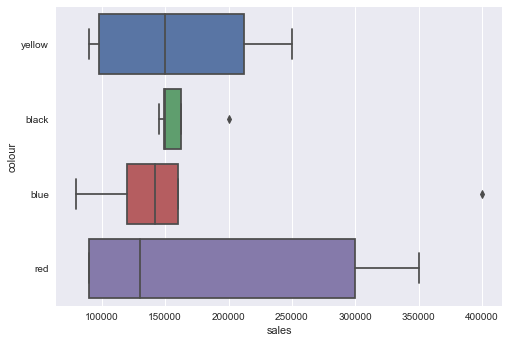

In [18]:
sns.boxplot(x='sales',y='colour',data=sales_df)

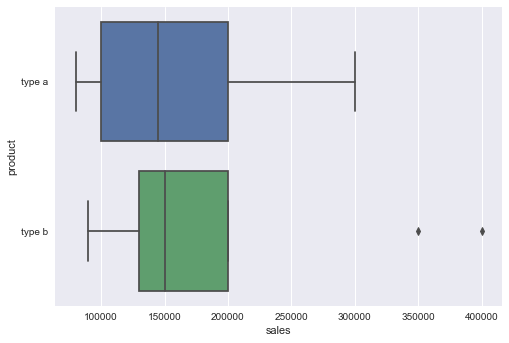

In [19]:
sns.boxplot(x='sales',y='product',data=sales_df)

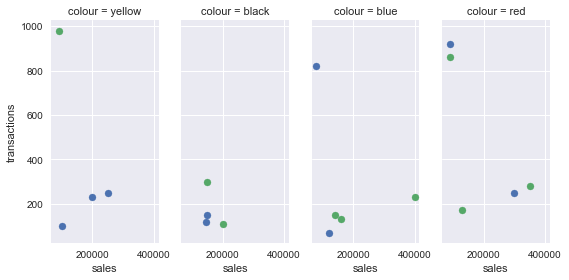

In [20]:
graph=sns.FacetGrid(sales_df,col='colour',height=4,hue='product',aspect=0.5)
graph.map(plt.scatter,'sales','transactions')

# split


In [21]:
# group data by colour
data_grp= sales_df.groupby('colour')

In [22]:
data_grp.groups

{'black': Int64Index([1, 5, 9, 13], dtype='int64'),
 'blue': Int64Index([2, 6, 10, 14, 16], dtype='int64'),
 'red': Int64Index([3, 7, 11, 15, 17], dtype='int64'),
 'yellow': Int64Index([0, 4, 8, 12], dtype='int64')}

In [23]:
for key,values in data_grp:
    print(key)
    print(values)
    print('--------')

black
   colour   sales  transactions product
1   black  150000           150  type a
5   black  145000           120  type a
9   black  200000           110  type b
13  black  150000           300  type b
--------
blue
   colour   sales  transactions product
2    blue   80000           820  type a
6    blue  120000            70  type a
10   blue  160000           130  type b
14   blue  142000           150  type b
16   blue  400000           230  type b
--------
red
   colour   sales  transactions product
3     red   90000           920  type a
7     red  300000           250  type a
11    red   90000           860  type b
15    red  130000           170  type b
17    red  350000           280  type b
--------
yellow
    colour   sales  transactions product
0   yellow  100000           100  type a
4   yellow  200000           230  type a
8   yellow  250000           250  type a
12  yellow   90100           980  type b
--------


In [24]:
#groupby multiple columns
multipe_grp= sales_df.groupby(['product','colour'])

In [25]:
multipe_grp.sum()

sales  transactions
product colour                      
type a  black   295000           270
        blue    200000           890
        red     390000          1170
        yellow  550000           580
type b  black   350000           410
        blue    702000           510
        red     570000          1310
        yellow   90100           980

# apply


In [26]:
#aggregate function using dict
multipe_grp.agg({'sales':'sum','transactions':'median'})

sales  transactions
product colour                      
type a  black   295000           135
        blue    200000           445
        red     390000           585
        yellow  550000           230
type b  black   350000           205
        blue    702000           150
        red     570000           280
        yellow   90100           980

In [27]:
multipe_grp.agg({'sales':'sum','transactions':['median','count']})

sales transactions      
                   sum       median count
product colour                           
type a  black   295000          135     2
        blue    200000          445     2
        red     390000          585     2
        yellow  550000          230     3
type b  black   350000          205     2
        blue    702000          150     3
        red     570000          280     3
        yellow   90100          980     1

In [28]:
#transformation
sales_df.head()

,colour,sales,transactions,product
0,yellow,100000,100,type a
1,black,150000,150,type a
2,blue,80000,820,type a
3,red,90000,920,type a
4,yellow,200000,230,type a


In [29]:
sales_df['revnue']= sales_df['sales']/sales_df['transactions']

In [30]:
sales_df.head()

,colour,sales,transactions,product,revnue
0,yellow,100000,100,type a,1000.000000
1,black,150000,150,type a,1000.000000
2,blue,80000,820,type a,97.560976
3,red,90000,920,type a,97.826087
4,yellow,200000,230,type a,869.565217


In [31]:
#apply standardization
data_grp['sales'].apply(lambda x : (x-x.mean())/x.std())

0    -0.770946
1    -0.433682
2    -0.794706
3    -0.824083
4     0.513429
5    -0.626430
6    -0.478090
7     0.872558
8     1.155617
9     1.493795
10   -0.161474
11   -0.824083
12   -0.898099
13   -0.433682
14   -0.303951
15   -0.500913
16    1.738221
17    1.276520
Name: sales, dtype: float64

In [32]:
sales_df['sales_product_std']=sales_df.groupby('product',as_index=True)['sales'].transform('std')
sales_df

,colour,sales,transactions,product,revnue,sales_product_std
0,yellow,100000,100,type a,1000.000000,75929.426297
1,black,150000,150,type a,1000.000000,75929.426297
2,blue,80000,820,type a,97.560976,75929.426297
3,red,90000,920,type a,97.826087,75929.426297
4,yellow,200000,230,type a,869.565217,75929.426297
5,black,145000,120,type a,1208.333333,75929.426297
6,blue,120000,70,type a,1714.285714,75929.426297
7,red,300000,250,type a,1200.000000,75929.426297
8,yellow,250000,250,type a,1000.000000,75929.426297
9,black,200000,110,type b,1818.181818,110783.301991


In [33]:
# apply Vs transform
sales_df.groupby('product')['sales'].apply(lambda x: x.std())

product
type a     75929.426297
type b    110783.301991
Name: sales, dtype: float64

In [34]:
sales_df['stds_colour_sales']= data_grp['sales'].apply(lambda x : (x-x.mean())/x.std())

In [35]:
sales_df

,colour,sales,transactions,product,revnue,sales_product_std,stds_colour_sales
0,yellow,100000,100,type a,1000.000000,75929.426297,-0.770946
1,black,150000,150,type a,1000.000000,75929.426297,-0.433682
2,blue,80000,820,type a,97.560976,75929.426297,-0.794706
3,red,90000,920,type a,97.826087,75929.426297,-0.824083
4,yellow,200000,230,type a,869.565217,75929.426297,0.513429
5,black,145000,120,type a,1208.333333,75929.426297,-0.626430
6,blue,120000,70,type a,1714.285714,75929.426297,-0.478090
7,red,300000,250,type a,1200.000000,75929.426297,0.872558
8,yellow,250000,250,type a,1000.000000,75929.426297,1.155617
9,black,200000,110,type b,1818.181818,110783.301991,1.493795


In [36]:
sales_df['x.mean']=sales_df.groupby('colour')['sales'].transform('mean')
sales_df

,colour,sales,transactions,product,revnue,sales_product_std,stds_colour_sales,x.mean
0,yellow,100000,100,type a,1000.000000,75929.426297,-0.770946,160025
1,black,150000,150,type a,1000.000000,75929.426297,-0.433682,161250
2,blue,80000,820,type a,97.560976,75929.426297,-0.794706,180400
3,red,90000,920,type a,97.826087,75929.426297,-0.824083,192000
4,yellow,200000,230,type a,869.565217,75929.426297,0.513429,160025
5,black,145000,120,type a,1208.333333,75929.426297,-0.626430,161250
6,blue,120000,70,type a,1714.285714,75929.426297,-0.478090,180400
7,red,300000,250,type a,1200.000000,75929.426297,0.872558,192000
8,yellow,250000,250,type a,1000.000000,75929.426297,1.155617,160025
9,black,200000,110,type b,1818.181818,110783.301991,1.493795,161250


In [37]:
#apply Vs transform
sales_df['x.mean']=sales_df.groupby('colour')['sales'].apply(lambda x: x.mean())
sales_df

,colour,sales,transactions,product,revnue,sales_product_std,stds_colour_sales,x.mean
0,yellow,100000,100,type a,1000.000000,75929.426297,-0.770946,NaN
1,black,150000,150,type a,1000.000000,75929.426297,-0.433682,NaN
2,blue,80000,820,type a,97.560976,75929.426297,-0.794706,NaN
3,red,90000,920,type a,97.826087,75929.426297,-0.824083,NaN
4,yellow,200000,230,type a,869.565217,75929.426297,0.513429,NaN
5,black,145000,120,type a,1208.333333,75929.426297,-0.626430,NaN
6,blue,120000,70,type a,1714.285714,75929.426297,-0.478090,NaN
7,red,300000,250,type a,1200.000000,75929.426297,0.872558,NaN
8,yellow,250000,250,type a,1000.000000,75929.426297,1.155617,NaN
9,black,200000,110,type b,1818.181818,110783.301991,1.493795,NaN


# transform works only on series and fills all the rows 
# apply function can be used for the dataframe as well but dosen't fill whole rows

In [38]:
sales_df.groupby('colour')['sales'].apply(lambda x: x.mean())

colour
black     161250.0
blue      180400.0
red       192000.0
yellow    160025.0
Name: sales, dtype: float64

# this is why our rows were filled with null values


In [39]:
del sales_df['x.mean']

In [40]:
sales_df

,colour,sales,transactions,product,revnue,sales_product_std,stds_colour_sales
0,yellow,100000,100,type a,1000.000000,75929.426297,-0.770946
1,black,150000,150,type a,1000.000000,75929.426297,-0.433682
2,blue,80000,820,type a,97.560976,75929.426297,-0.794706
3,red,90000,920,type a,97.826087,75929.426297,-0.824083
4,yellow,200000,230,type a,869.565217,75929.426297,0.513429
5,black,145000,120,type a,1208.333333,75929.426297,-0.626430
6,blue,120000,70,type a,1714.285714,75929.426297,-0.478090
7,red,300000,250,type a,1200.000000,75929.426297,0.872558
8,yellow,250000,250,type a,1000.000000,75929.426297,1.155617
9,black,200000,110,type b,1818.181818,110783.301991,1.493795


# combine


In [61]:
def coef_var(x):
    cvn=x.std()/x.mean()
    return cvn

In [57]:
multipe_grp['sales'].agg([np.mean,np.median])

mean  median
product colour                       
type a  black   147500.000000  147500
        blue    100000.000000  100000
        red     195000.000000  195000
        yellow  183333.333333  200000
type b  black   175000.000000  175000
        blue    234000.000000  160000
        red     190000.000000  130000
        yellow   90100.000000   90100

In [62]:
multipe_grp['sales'].apply(coef_var)

product  colour
type a   black     0.023970
         blue      0.282843
         red       0.761500
         yellow    0.416598
type b   black     0.202031
         blue      0.615563
         red       0.736842
         yellow         NaN
Name: sales, dtype: float64